# Tracking speed - Benchmarks 4

In this experiment, we push MLtraq to see how it performs in tracking large 1D `NumPy` arrays.

* MLtraq - https://mltraq.com/

Varying:

* Size of arrays


## Imports and utility functions

In [1]:
%load_ext pyinstrument

In [2]:
import logging
import shutil
import threading
import uuid
from contextlib import contextmanager, redirect_stderr, redirect_stdout
from os import devnull, makedirs, remove

import matplotlib.pyplot as plt
import numpy as np

import mltraq
from mltraq.utils.plot import bar_plot

In [3]:
# Versions

print("mltraq", mltraq.__version__)

mltraq 0.1.135


In [4]:
# Utility functions


@contextmanager
def suppress_stdout_stderr():
    """
    A context manager that redirects stdout and stderr to devnull.
    """
    with open(devnull, "w") as fnull:
        with redirect_stderr(fnull) as err, redirect_stdout(fnull) as out:
            yield (err, out)


def remove_file(pathname):
    """
    Remove file `pathname` if existing.
    """
    try:
        remove(pathname)
    except OSError:
        pass


def create_dir(pathdir):
    """
    Create `pathdir` recursively. If it already exists, do nothing.
    """
    makedirs(pathdir, exist_ok=True)

## Test procedure for MLtraq

In [5]:
def test_mltraq_db_fs(size=1):
    """
    Test MLtraq tracking with a 1 array, in-db storage.
    """

    create_dir("tmp")
    db_fname = f"tmp/{uuid.uuid4()}.db"
    session = mltraq.create_session(f"sqlite:///{db_fname}")
    with mltraq.options().ctx({"tqdm.disable": True}):
        experiment = session.create_experiment()
        with experiment.run() as run:
            run.fields.a = np.zeros(size, dtype=np.int8)
        experiment.persist()
    experiment.delete()
    remove_file(db_fname)

In [6]:
def test_mltraq_db_mem(size=1):
    """
    Test MLtraq tracking with a 1 array, in-db storage.
    """

    session = mltraq.create_session()
    with mltraq.options().ctx({"tqdm.disable": True}):
        experiment = session.create_experiment()
        with experiment.run() as run:
            run.fields.a = np.zeros(size, dtype=np.int8)
        experiment.persist()
    experiment.delete()

In [7]:
def test_mltraq_fs(size=1):
    """
    Test MLtraq tracking with a specified number of arrays.
    """

    create_dir("tmp")
    db_fname = f"tmp/{uuid.uuid4()}.db"
    session = mltraq.create_session(f"sqlite:///{db_fname}")
    with mltraq.options().ctx({"tqdm.disable": True}):
        experiment = session.create_experiment()
        with experiment.run() as run:
            run.fields.ds = mltraq.DataStore()
            run.fields.ds.value = np.zeros(size, dtype=np.int8)
        experiment.persist()
    experiment.delete()
    remove_file(db_fname)

In [8]:
%%pyinstrument
test_mltraq_fs(size=10)

_     ._   __/__   _ _  _  _ _/_   Recorded: 16:10:16  Samples:  53
 /_//_/// /_\ / //_// / //_'/ //     Duration: 0.057     CPU time: 0.058
/   _/                      v4.6.2

Program: /Users/michele/dev/mltraq/.venv/lib/python3.11/site-packages/ipykernel_launcher.py -f /Users/michele/Library/Jupyter/runtime/kernel-5d74dc31-8723-4c23-91c0-14738be62df5.json

0.057 <module>  ../../../../../var/folders/2c/7zw87mvd2c386jc15bltj_qm0000gp/T/ipykernel_70125/2822152245.py:1
`- 0.057 test_mltraq_fs  ../../../../../var/folders/2c/7zw87mvd2c386jc15bltj_qm0000gp/T/ipykernel_70125/4004999031.py:1
   |- 0.026 Experiment.persist  mltraq/experiment.py:384
   |  |- 0.015 Experiment.delete  mltraq/experiment.py:435
   |  |  |- 0.007 Database.drop_table  mltraq/storage/database.py:184
   |  |  |  |- 0.006 MetaData.reflect  sqlalchemy/sql/schema.py:5619
   |  |  |  |     [58 frames hidden]  sqlalchemy, <string>, re, <built-in>
   |  |  |  `- 0.001 Table.drop  sqlalchemy/sql/schema.py:1290
   |  |  |        [13 frames hidden]  sqlalchemy
   |  |  |- 0.006 Query.count  sqlalchemy/orm/query.py:3053
   |  |  |     [83 frames hidden]  sqlalchemy, weakref
   |  |  |- 0.001 Query.filter_by  sqlalchemy/orm/query.py:1955
   |  |  |     [15 frames hidden]  sqlalchemy
   |  |  `- 0.001 Session.query  sqlalchemy/orm/session.py:2876
   |  |        [23 frames hidden]  sqlalchemy, weakref
   |  |- 0.003 Database.pandas_to_sql  mltraq/storage/database.py:142
   |  |  `- 0.003 wrapper  pandas/util/_decorators.py:325
   |  |        [33 frames hidden]  pandas, sqlalchemy, <built-in>, conte...
   |  |- 0.003 runs_to_sql  mltraq/storage/serialization.py:110
   |  |  |- 0.001 Series.map  pandas/core/series.py:4611
   |  |  |     [3 frames hidden]  pandas
   |  |  |        0.001 map_array  pandas/core/algorithms.py:1667
   |  |  |        `- 0.001 <lambda>  mltraq/storage/serialization.py:127
   |  |  |           `- 0.001 serialize  mltraq/storage/serialization.py:39
   |  |  |              `- 0.001 DataPakSerializer.serialize  mltraq/storage/serializers/datapak.py:110
   |  |  |                 `- 0.001 DataPakSerializer.encode  mltraq/storage/serializers/datapak.py:131
   |  |  |                    `- 0.001 DataPakSerializer.encode_magic_key  mltraq/storage/serializers/datapak.py:167
   |  |  |                       `- 0.001 DataStore.to_url  mltraq/storage/datastore.py:19
   |  |  |                          `- 0.001 DataStoreIO.serialize_write  mltraq/storage/datastore.py:73
   |  |  |                             `- 0.001 DataStoreIO.write  mltraq/storage/datastore.py:101
   |  |  |                                `- 0.001 DataStoreIO.get_next_pathname_url  mltraq/storage/datastore.py:87
   |  |  |                                   `- 0.001 makedirs  <frozen os>:200
   |  |  |                                         [2 frames hidden]  <frozen os>, <built-in>
   |  |  |- 0.001 DataFrame.__setitem__  pandas/core/frame.py:4259
   |  |  |     [11 frames hidden]  pandas, warnings, re, <built-in>
   |  |  `- 0.001 Runs.df  mltraq/runs.py:76
   |  |     `- 0.001 reorder_columns  mltraq/utils/frames.py:6
   |  |        `- 0.001 DataFrame.__getitem__  pandas/core/frame.py:4050
   |  |              [7 frames hidden]  pandas
   |  |- 0.002 Session.commit  sqlalchemy/orm/session.py:1936
   |  |     [27 frames hidden]  sqlalchemy, <string>, <built-in>
   |  |- 0.001 Experiment.get_tablename  mltraq/experiment.py:158
   |  |  `- 0.001 sanitize_table_name  mltraq/storage/database.py:266
   |  |     `- 0.001 sub  re/__init__.py:178
   |  |           [7 frames hidden]  re
   |  `- 0.001 Session.add  sqlalchemy/orm/session.py:3388
   |        [3 frames hidden]  sqlalchemy
   |- 0.024 Session.__init__  mltraq/session.py:22
   |  `- 0.024 Database.__init__  mltraq/storage/database.py:45
   |     |- 0.017 create_engine  <string>:1
   |     |     [31 frames hidden]  <string>, sqlalchemy, <built-in>, ipy...
   |     |- 0.004 MetaData.create_all  sqlalchemy/sql/schema.py:5801
   |     |    

## Defining the experiment

In [9]:
def eval_time(run: mltraq.Run):
    """
    Measure the time required to track a set of experiments.
    """

    # Disable logging
    logging.disable()

    with suppress_stdout_stderr():
        log = mltraq.Sequence()

        # Start tracking time.
        log.append(tag="begin")
        if run.params.method == "MLtraq-fs":
            test_mltraq_fs(size=run.params.size)
        elif run.params.method == "MLtraq-db-mem":
            test_mltraq_db_mem(size=run.params.size)
        elif run.params.method == "MLtraq-db-fs":
            test_mltraq_db_fs(size=run.params.size)
        else:
            raise Exception("unknown method")

        log.append(tag="end")
        durations = log.df().pivot_table(index="tag", values="timestamp")["timestamp"]
        run.fields.duration = (durations.end - durations.begin).total_seconds()
        run.fields.n_threads = threading.active_count()
        run.fields |= run.params


def cleanup(run: mltraq.Run):
    # Remove temporary files
    shutil.rmtree("tmp", ignore_errors=True)

## Defining the plots

In [10]:
def report_results(experiment: mltraq.Experiment, save_svg_to=None):
    """
    Given an executed experiment, report the results with a plot and a table.
    """

    fig, ax1 = plt.subplots(figsize=[10, 2], nrows=1, ncols=1)
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.4)

    with mltraq.options().ctx(
        {
            "matplotlib.rc": {"hatch.color": "white"},
            "matplotlib.style": "tableau-colorblind10",
        }
    ):

        bar_plot(
            experiment.runs.df(),
            x="size",
            x_label="Size of array",
            y="duration",
            yerr=True,
            y_label="Duration (s)",
            group="method",
            ax=ax1,
            y_lim={"bottom": 0},
            legend={
                "loc": "lower center",
                "bbox_to_anchor": (0.5, -1.1),
                "fancybox": True,
                "shadow": False,
                "ncol": 2,
            },
            y_grid=True,
        )
        labels = [int(item.get_text()) for item in ax1.get_xticklabels()]
        labels = [f"{int(x/(10**6))} MB" for x in labels]
        ax1.set_xticklabels(labels)

    if save_svg_to:
        plt.savefig(save_svg_to, bbox_inches="tight", pad_inches=0.1)

    plt.show()

    # Display aggregated results table (duration and multiplier to the best-performing method)
    print("\nAveraged results by method\n")
    df = experiment.runs.df().groupby("method")["duration"].mean().sort_values().to_frame()
    df["ratio_to_best"] = df["duration"] / df["duration"].iloc[0]
    display(df)
    print("\n")

## Experiments


In [12]:
# Create an MLtraq session to track the benchmarks
session = mltraq.create_session("sqlite:///local/benchmarks3.db")

### Experiment 1: How long does tracking a 1D NumPy array of int8 values of size up to 1^9?


In [13]:
e = session.create_experiment("exp-1", if_exists="replace")
e.add_runs(
    method=["MLtraq-fs", "MLtraq-db-mem", "MLtraq-db-fs"],
    i=range(5),
    size=np.linspace(int(10**8), int(10**9), 10, dtype=int),
)

# Parallelization is disabled as it might affect results.
e.execute([cleanup, eval_time, cleanup], n_jobs=1).persist(if_exists="replace")

  1%|          | 1/150 [00:01<04:17,  1.73s/it]

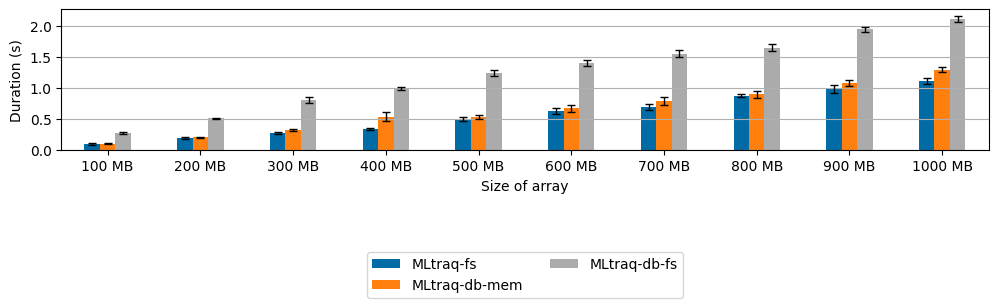


Averaged results by method



,duration,ratio_to_best
method,,
MLtraq-fs,0.571125,1.000000
MLtraq-db-mem,0.642698,1.125319
MLtraq-db-fs,1.248119,2.185370


In [14]:
# Report results
report_results(session.load_experiment("exp-1"))